# Adult Income Analysis
Source of Dataset: https://www.kaggle.com/datasets/wenruliu/adult-income-dataset

In [1]:
# Import system libraries
import os
import datetime
import time

# Import standard data science libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce # For binary encoding
from scipy import stats
from math import sqrt

# Import ML algorithms
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import NuSVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# For data preprocessing, cleaning, evaluation and hyperparameters tuning
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, accuracy_score, roc_curve, roc_auc_score, auc, confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import RFECV
from sklearn import metrics
import re   # For searching the intended value
import datetime

# To ignore warning
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# CHANGE INTO YOUR DATASET DIRECTORY
os.chdir(r" ")
os.getcwd()

### 1. EDA and Data Cleaning

1.1 General data cleaning by removing / imputing the missing values.

In [3]:
df = pd.read_csv("adult.csv")
df.head()

age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18          ?  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                  ?    Own-child  White  Female             0             0   

   hours-per-week native-country income  
0              40  United-States  <=50K  
1              50  United-States  <=50K  
2              40  United-States   >50K  
3              40  United-States   >50K  
4              30  United-States  <=50K

In [4]:
df.shape

(48842, 15)

In [5]:
# Check if there is any missing value in any of the column.
df.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [6]:
# Check the number of data, whether there is any missing value, and the data type of each column.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


But be mindful that for some datasets "non-null" doesn't necessarily mean there isn't any missing value, as we know that in this dataset some missing values are represented by "?" instead.

More on this later.

In [7]:
df["workclass"].value_counts()

# Now we can see that we have 2799 counts of "?" in the "workclass" column, which is actually missing value.

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [8]:
df["education"].value_counts()

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

In [9]:
df["marital-status"].value_counts()

marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64

In [10]:
df["occupation"].value_counts()

# Another 2809 counts of "?" in the "occupation" column.

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [11]:
df["relationship"].value_counts()

relationship
Husband           19716
Not-in-family     12583
Own-child          7581
Unmarried          5125
Wife               2331
Other-relative     1506
Name: count, dtype: int64

In [12]:
df["race"].value_counts()

race
White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: count, dtype: int64

In [13]:
df["gender"].value_counts()

gender
Male      32650
Female    16192
Name: count, dtype: int64

In [14]:
df["native-country"].value_counts()

# Another 857 counts of "?" in the "native-country" column.

native-country
United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru         

In [15]:
df["income"].value_counts()

# "income" column will be our target, and apparently the imbalance isn't too bad.

income
<=50K    37155
>50K     11687
Name: count, dtype: int64

In [16]:
# Exclude all the rows of "workclass" column with "?".
df_new = df[df["workclass"] != "?"]

# Check how many rows left after the removal.
df_new.shape

(46043, 15)

In [17]:
# Exclude all the rows of "occupation" column with "?".
df_new = df_new[df_new["occupation"] != "?"]

# Check how many rows left after the removal.
df_new.shape

(46033, 15)

In [18]:
# Exclude all the rows of "native-country" column with "?".
df_new = df_new[df_new["native-country"] != "?"]

# Check how many rows left after the removal.
df_new.shape

(45222, 15)

Pros of removing the rows with missing values:
1. Fast way to clean the data.
2. Need not to make assumption to impute the data which may lead to skewness of data / results. Imputation is actually making assumptions.

Cons of removing the rows with missing values:
1. Loss of data

Therefore when we remove the rows with missing values, we also need to keep track of how many rows (data) has been lost along the process.

It seems that we have reduced our data size from 48,842 to 45,222, which is not too bad.

1.2 EDA
1. How the distribution of age looks like?

In [19]:
# Preview the new DataFrame.
df_new.head(3)

age  workclass  fnlwgt   education  educational-num      marital-status  \
0   25    Private  226802        11th                7       Never-married   
1   38    Private   89814     HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951  Assoc-acdm               12  Married-civ-spouse   

          occupation relationship   race gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black   Male             0             0   
1    Farming-fishing      Husband  White   Male             0             0   
2    Protective-serv      Husband  White   Male             0             0   

   hours-per-week native-country income  
0              40  United-States  <=50K  
1              50  United-States  <=50K  
2              40  United-States   >50K

In [20]:
# Define a function to create column plot for all the categorical columns
def bar_subplots (df, list_of_headers):
    """
    Input a DataFrame and the list of its column headers of continuous variables, and it will generate barplots
    """
    import math
    nrows = int(math.sqrt(len(list_of_headers)))+1
    ncols = int(math.sqrt(len(list_of_headers)))+1
    fig = plt.figure(figsize=(18, 12))
    ax = [None]*len(list_of_headers) # Initialize ax
    for index, value in enumerate(list_of_headers):
        ax[index] = fig.add_subplot(nrows, ncols, index+1)
        sns.countplot(x=value, data=df, ax=ax[index], palette="viridis")
        # ax[index].bar(df[value].value_counts().index.to_list(), height=df_new[value].value_counts().to_list())
        ax[index].set_title(value)

        # Rotate xticks
        for tick in ax[index].get_xticklabels():
            tick.set_rotation(90)
    
    plt.tight_layout()
    plt.show();

In [21]:
df_new.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

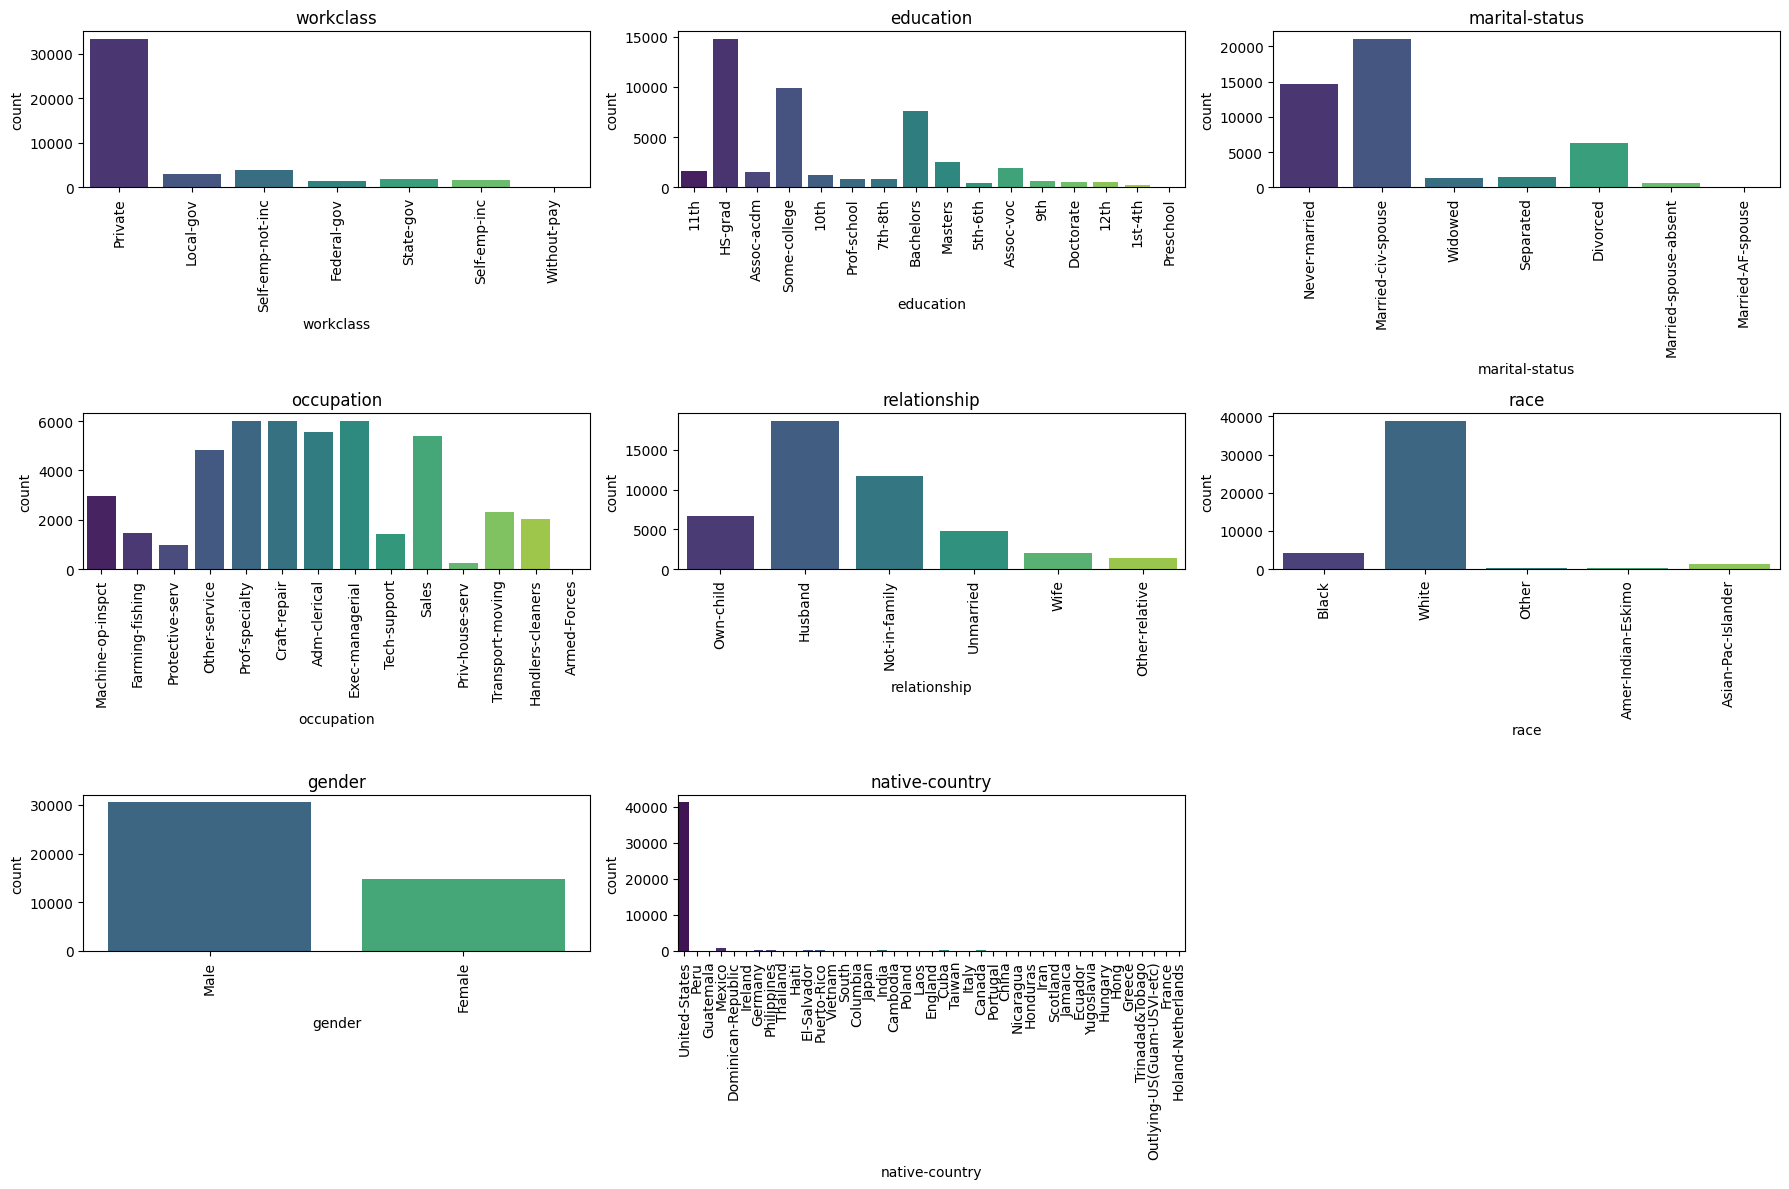

In [22]:
# Plot barplots.
bar_subplots(df_new, ["workclass", 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country'])

In [23]:
# Define a function to create histogram.
def histogram_subplots (df, list_of_headers):
    """
    Input a DataFrame and the list of its column headers of continuous variables, and it will generate histograms
    """
    import math
    nrows = int(math.sqrt(len(list_of_headers)))+1
    ncols = int(math.sqrt(len(list_of_headers)))+1
    fig = plt.figure(figsize=(10, 8))
    ax = [None]*len(list_of_headers) # Initialize ax
    for index, value in enumerate(list_of_headers):
        ax[index] = fig.add_subplot(nrows, ncols, index+1)
        sns.histplot(data=df, x=value, ax=ax[index], color='skyblue', bins=15)
        # sns.histplot(x=value, data=df, ax=ax[index], palette="viridis")
        # ax[index].hist(df[value])
        ax[index].set_title(value)

        # Rotate xticks
        for tick in ax[index].get_xticklabels():
            tick.set_rotation(90)
    
    plt.tight_layout()
    plt.show();

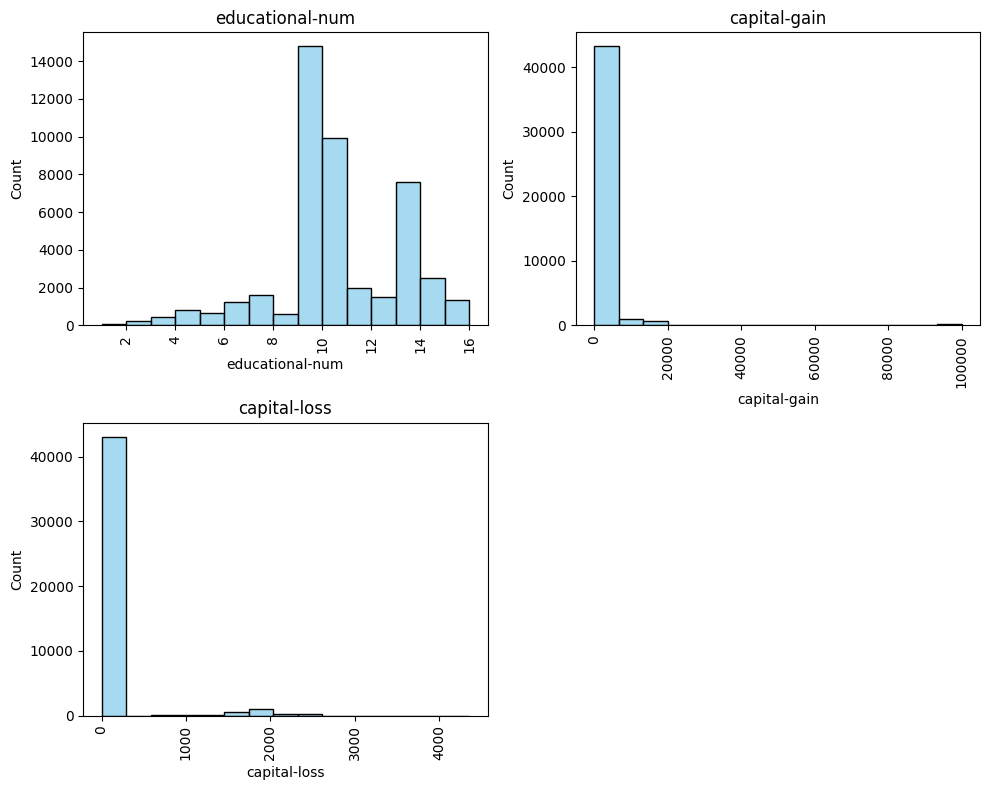

In [24]:
histogram_subplots(df_new, ['educational-num', 'capital-gain', 'capital-loss'])

In [25]:
# Manually encode the target column of "income" so that we know what do 0 and 1 represent exactly.
df_new.replace(["<=50K", ">50K"], [0, 1], inplace=True)
df_new.head()

age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
5   34    Private  198693          10th                6       Never-married   

          occupation   relationship   race gender  capital-gain  capital-loss  \
0  Machine-op-inspct      Own-child  Black   Male             0             0   
1    Farming-fishing        Husband  White   Male             0             0   
2    Protective-serv        Husband  White   Male             0             0   
3  Machine-op-inspct        Husband  Black   Male          7688             0   
5      Other-service  Not-in-family  White   Male             0             0   

   hours-per-week native-country  income  
0              40  United-States       0  
1              50  United-States       0  
2              40  United-States       1  
3              40  United-States       1  
5              30  United-States       0

In [26]:
def correlation_heatmap(df):
    correlation_matrix = df.corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
    plt.title("Correlation Heatmap")
    plt.show();

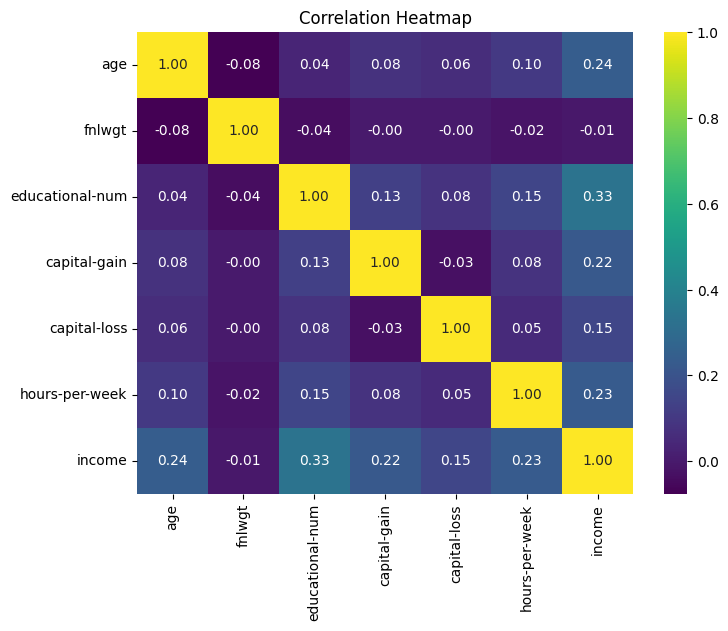

In [27]:
# Plot correlation heatmap by only including numerical columns.
correlation_heatmap(df_new[["age", "fnlwgt", "educational-num", "capital-gain", "capital-loss", "hours-per-week", "income"]])

In [28]:
# Define a function to create boxplots.
def boxplot_subplots(df, list_of_headers):
    """
    Input a DataFrame and the list of its column headers of continuous variables, and it will generate all the boxplots
    """
    import math

    nrows = int(math.sqrt(len(list_of_headers))) + 1
    ncols = int(math.sqrt(len(list_of_headers))) + 1
    
    fig, axs = plt.subplots(nrows, ncols, figsize=(15, 10))

    for ax, column in zip(axs.flatten(), list_of_headers):
        sns.boxplot(x=df[column], ax=ax, color='skyblue')
        ax.set_title(f"Boxplot of {column}", fontsize=10)
        ax.set_xlabel('')

    # Remove empty subplots
    for ax in axs.flatten()[len(list_of_headers):]:
        fig.delaxes(ax)

    plt.tight_layout()
    plt.show()

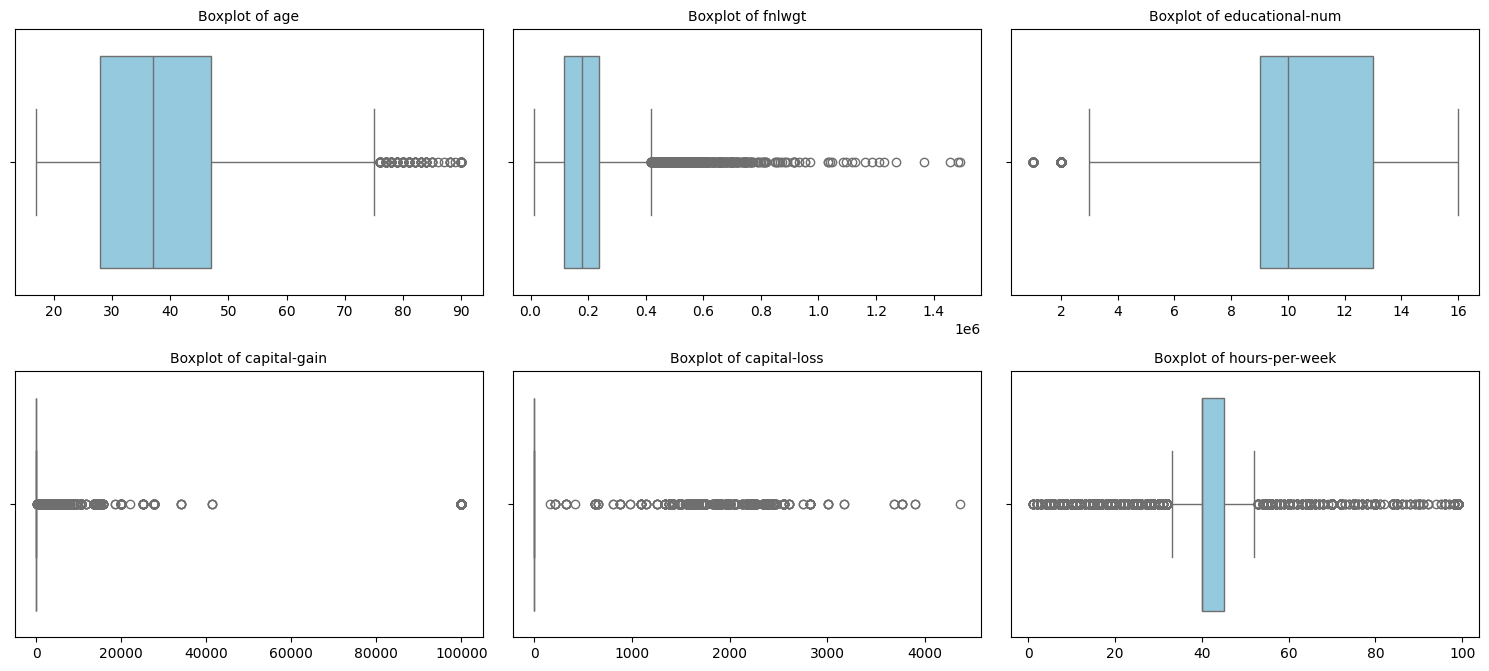

In [29]:
# Create boxplots for the numerical data.
boxplot_subplots(df_new, ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week'])

[0, 1]
[34014, 11208]


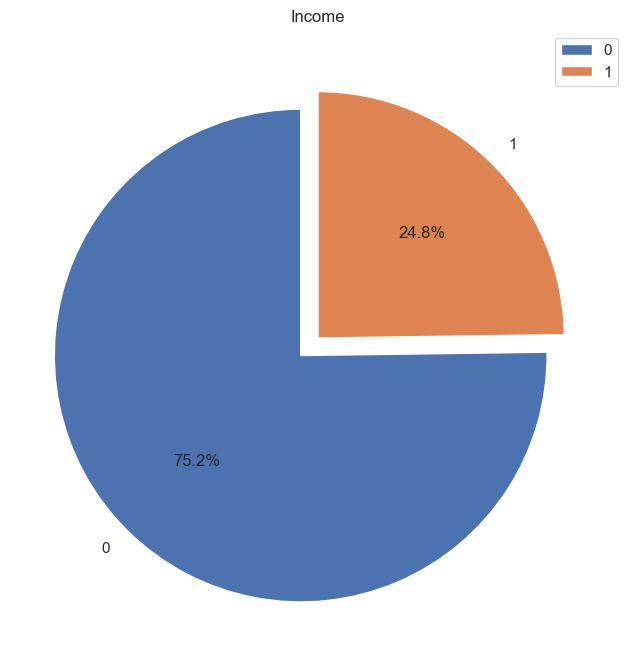

In [30]:
# Create a pie chart for target.
sns.set(style='white')

x = []
y = []

for key, value in df_new["income"].value_counts().items():
    x.append(key)
    y.append(value)
print(x)
print(y)
color = ["orange","cyan", "blue", "purple", "yellow", "red", "green"]
plt.figure(figsize=(15,8))
plt.pie(y, labels=x, autopct='%1.1f%%', startangle=90, explode=(0.1, 0))
plt.title("Income")
plt.legend(loc="upper right")
plt.show();

#### 1.2 Encode the categorical data

In [31]:
# Firstly we create a list of column headers with categorical data.
# Create a list of categorical features.
cat_list = [item for item in df_new.columns if df_new[item].dtype == "object"]
cat_list

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'native-country']

Since these categorical columns consist of very large number of unique values, one-hot encoding will lead to very high dimensionality which is too complex for modelling and the model will potentially become unreliable.

At the same time since these columns are nominal data, ordinal encoding (while doesn't lead to high dimensionality) is also not suitable for them.

Therefore we will try to use `Binary Encoding` to encode them.

In [32]:
# Encode the categorical data with Binary Encoding.
encoder = ce.BinaryEncoder(cols=cat_list)
df_binary = encoder.fit_transform(df_new)
df_binary.head()

age  workclass_0  workclass_1  workclass_2  fnlwgt  education_0  \
0   25            0            0            1  226802            0   
1   38            0            0            1   89814            0   
2   28            0            1            0  336951            0   
3   44            0            0            1  160323            0   
5   34            0            0            1  198693            0   

   education_1  education_2  education_3  education_4  ...  capital-gain  \
0            0            0            0            1  ...             0   
1            0            0            1            0  ...             0   
2            0            0            1            1  ...             0   
3            0            1            0            0  ...          7688   
5            0            1            0            1  ...             0   

   capital-loss  hours-per-week  native-country_0  native-country_1  \
0             0              40                 0                 0   
1             0              50                 0                 0   
2             0              40                 0                 0   
3             0              40                 0                 0   
5             0              30                 0                 0   

   native-country_2  native-country_3  native-country_4  native-country_5  \
0                 0                 0                 0                 1   
1                 0                 0                 0                 1   
2                 0                 0                 0                 1   
3                 0                 0                 0                 1   
5                 0                 0                 0                 1   

   income  
0       0  
1       0  
2       1  
3       1  
5       0  

[5 rows x 36 columns]

In [33]:
def correlation_heatmap_spearman(df):
    correlation_matrix = df.corr(method="spearman")
    plt.figure(figsize=(20, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
    plt.title("Correlation Heatmap")
    plt.show();

In [34]:
cat_list_2 = df_binary.columns.to_list()
len(cat_list_2)

36

In [35]:
cat_list_2 = [item for item in cat_list_2 if item not in ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']]
cat_list_2[:3]

['workclass_0', 'workclass_1', 'workclass_2']

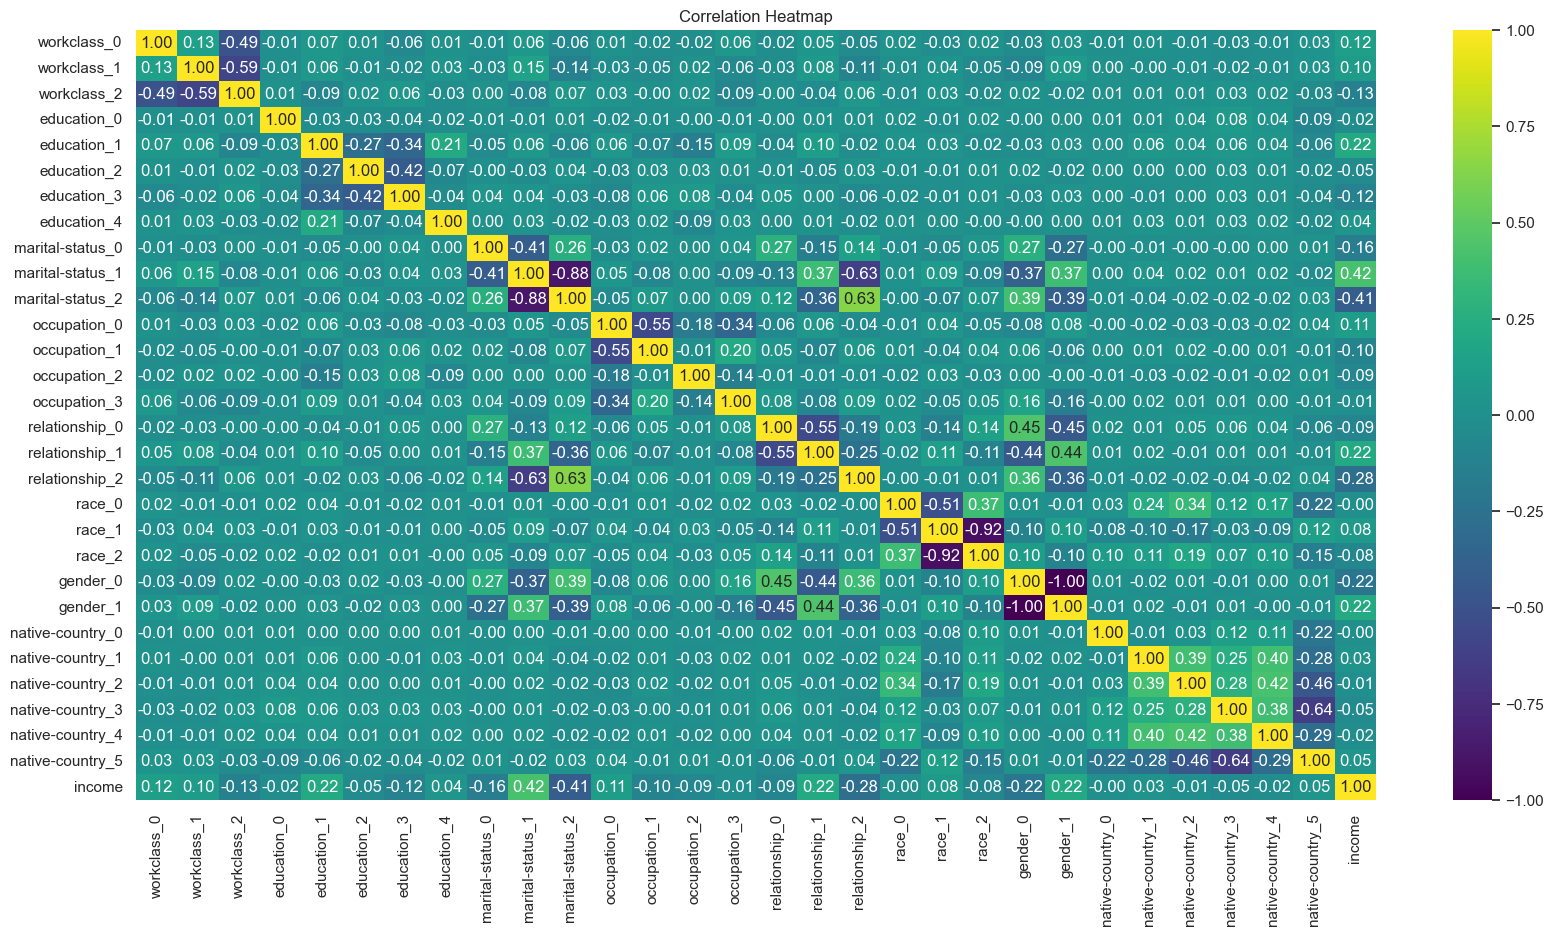

In [36]:
correlation_heatmap_spearman(df_binary[cat_list_2])

#### 1.3 Outliers Removal

In [37]:
# Define a function to create boxplots.
def boxplot_subplots(df, list_of_headers):
    """
    Input a DataFrame and the list of its column headers of continuous variables, and it will generate all the boxplots
    """
    import math

    nrows = int(math.sqrt(len(list_of_headers))) + 1
    ncols = int(math.sqrt(len(list_of_headers))) + 1

    fig, axs = plt.subplots(nrows, ncols, figsize=(15, 10))

    for ax, column in zip(axs.flatten(), list_of_headers):
        sns.boxplot(x=df[column], ax=ax, color='skyblue')
        ax.set_title(f"Boxplot of {column}", fontsize=10)
        ax.set_xlabel('')

    # Remove empty subplots
    for ax in axs.flatten()[len(list_of_headers):]:
        fig.delaxes(ax)

    plt.tight_layout()
    plt.show()

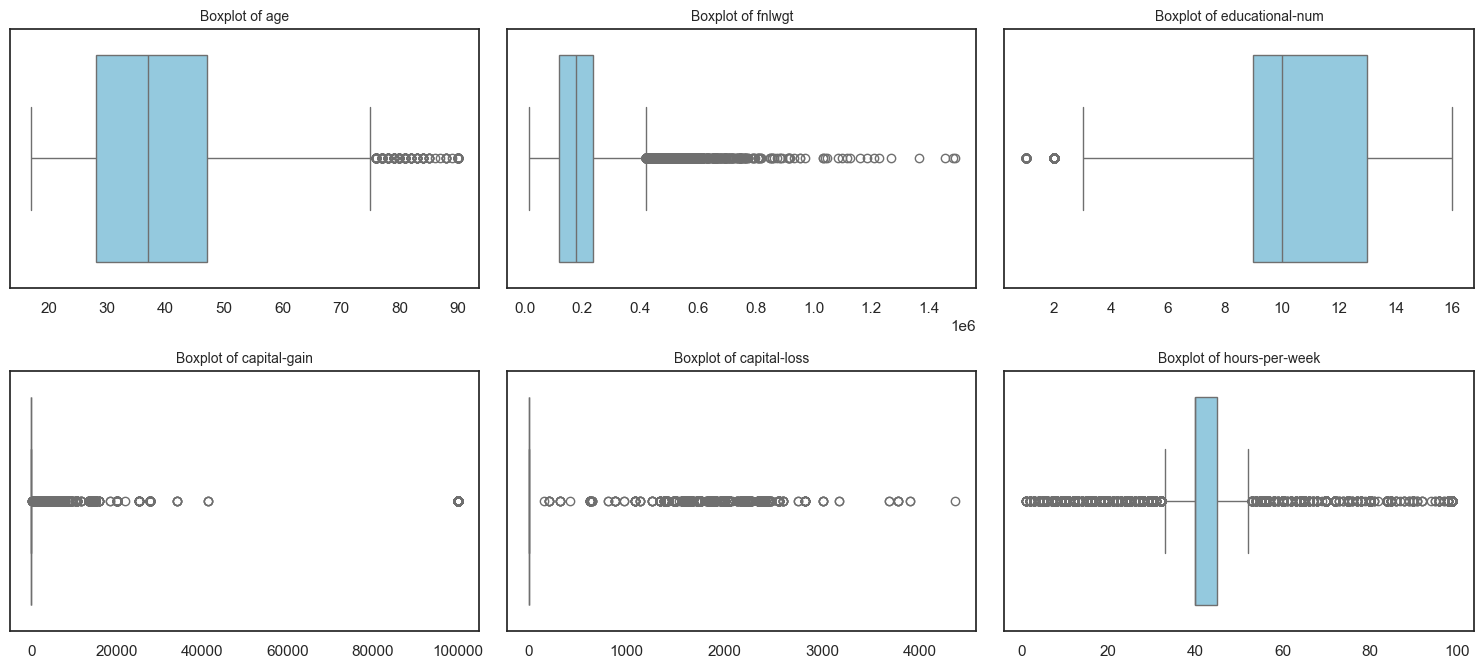

In [38]:
# Create boxplots for the numerical data.
boxplot_subplots(df_binary, ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week'])

In [39]:
# Check the shape of df_binary before outliers removal.
df_binary.shape

(45222, 36)

In [40]:
# Define a function to remove outliers from each column.
def remove_outliers(df, column_list, excluded_outliers):
    """ 
    1. Pass a Pandas DataFrame.
    2. Pass a list of columns that we want this function to exclude the respective outliers from.
    3. For "excluded_outliers", set the amount of IQR as exclusion threshold. The SMALLER number it gets the MORE outliers will be excluded.
    """
    for item in column_list:
        Q1 = df[item].quantile(0.25)
        Q3 = df[item].quantile(0.75)
        IQR = Q3 - Q1
        outliers = df[(df[item] < (Q1 - excluded_outliers * IQR)) | (df[item] > (Q3 + excluded_outliers * IQR))].index
        df.drop(outliers, axis=0, inplace=True)
    return df

In [41]:
# Remove the outliers
# remove_outliers(df_binary, ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week'], excluded_outliers=25)

In [42]:
# Check the size of df_binary after outliers removal.
df_binary.shape

(45222, 36)

#### 1.4 Scaling
- Some columns contains values a lot larger than other columns.
- We would address this by applying scaling on these columns.

In [43]:
# Instantiate list of columns with numerical data to be scaled.
scaled_columns = []

# Find which column contains very large values in proportion to other columns.
for item in df_binary.columns:
    print(f"For column {item}, the min is {df_binary[item].min()}, max is {df_binary[item].max()}")
    if df_binary[item].min() > 5 or df_binary[item].max() > 10:
        scaled_columns.append(item)
 
# Check the columns returned
scaled_columns

For column age, the min is 17, max is 90
For column workclass_0, the min is 0, max is 1
For column workclass_1, the min is 0, max is 1
For column workclass_2, the min is 0, max is 1
For column fnlwgt, the min is 13492, max is 1490400
For column education_0, the min is 0, max is 1
For column education_1, the min is 0, max is 1
For column education_2, the min is 0, max is 1
For column education_3, the min is 0, max is 1
For column education_4, the min is 0, max is 1
For column educational-num, the min is 1, max is 16
For column marital-status_0, the min is 0, max is 1
For column marital-status_1, the min is 0, max is 1
For column marital-status_2, the min is 0, max is 1
For column occupation_0, the min is 0, max is 1
For column occupation_1, the min is 0, max is 1
For column occupation_2, the min is 0, max is 1
For column occupation_3, the min is 0, max is 1
For column relationship_0, the min is 0, max is 1
For column relationship_1, the min is 0, max is 1
For column relationship_2, the 

['age',
 'fnlwgt',
 'educational-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [44]:
# Before the columns are scaled.
df_binary[scaled_columns][:5]

age  fnlwgt  educational-num  capital-gain  capital-loss  hours-per-week
0   25  226802                7             0             0              40
1   38   89814                9             0             0              50
2   28  336951               12             0             0              40
3   44  160323               10          7688             0              40
5   34  198693                6             0             0              30

In [45]:
# Apply StandardScaler for scaled_columns
scaler = StandardScaler()
df_binary[scaled_columns] = scaler.fit_transform(df_binary[scaled_columns])
df_binary.head()

age  workclass_0  workclass_1  workclass_2    fnlwgt  education_0  \
0 -1.024983            0            0            1  0.350889            0   
1 -0.041455            0            0            1 -0.945878            0   
2 -0.798015            0            1            0  1.393592            0   
3  0.412481            0            0            1 -0.278420            0   
5 -0.344079            0            0            1  0.084802            0   

   education_1  education_2  education_3  education_4  ...  capital-gain  \
0            0            0            0            1  ...     -0.146733   
1            0            0            1            0  ...     -0.146733   
2            0            0            1            1  ...     -0.146733   
3            0            1            0            0  ...      0.877467   
5            0            1            0            1  ...     -0.146733   

   capital-loss  hours-per-week  native-country_0  native-country_1  \
0      -0.21878       -0.078120                 0                 0   
1      -0.21878        0.754701                 0                 0   
2      -0.21878       -0.078120                 0                 0   
3      -0.21878       -0.078120                 0                 0   
5      -0.21878       -0.910942                 0                 0   

   native-country_2  native-country_3  native-country_4  native-country_5  \
0                 0                 0                 0                 1   
1                 0                 0                 0                 1   
2                 0                 0                 0                 1   
3                 0                 0                 0                 1   
5                 0                 0                 0                 1   

   income  
0       0  
1       0  
2       1  
3       1  
5       0  

[5 rows x 36 columns]

In [46]:
# After the columns are scaled.
df_binary[scaled_columns][:5]

age    fnlwgt  educational-num  capital-gain  capital-loss  \
0 -1.024983  0.350889        -1.221559     -0.146733      -0.21878   
1 -0.041455 -0.945878        -0.438122     -0.146733      -0.21878   
2 -0.798015  1.393592         0.737034     -0.146733      -0.21878   
3  0.412481 -0.278420        -0.046403      0.877467      -0.21878   
5 -0.344079  0.084802        -1.613277     -0.146733      -0.21878   

   hours-per-week  
0       -0.078120  
1        0.754701  
2       -0.078120  
3       -0.078120  
5       -0.910942

### 2. Machine Learning Modeling

#### 2.1 Define features and target

In [47]:
# Define the features and target.
X = df_binary.drop(["income"], axis=1)
y = df_binary["income"]

In [48]:
# Split for test data.
X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_temp.shape, X_test.shape, y_train_temp.shape, y_test.shape

((36177, 35), (9045, 35), (36177,), (9045,))

In [49]:
# Split for both training and validation data.
X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.2, random_state=42)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((28941, 35), (7236, 35), (28941,), (7236,))

#### 2.2 Base Models Selection

In [50]:
# Create a list of base models to be selected
models_list = [
    LogisticRegression(n_jobs=-1, max_iter=1000, random_state=42),
    GaussianNB(),
    HistGradientBoostingClassifier(random_state=42),
    SGDClassifier(n_jobs=-1, random_state=42),
    RandomForestClassifier(n_jobs=-1, random_state=42),
    XGBClassifier(n_jobs=-1, random_state=42),
    CatBoostClassifier(thread_count=-1, random_state=42)
]

In [51]:
# Define a function to perform model fitting and output Accuracy, Precision, Recall and F1 scores with cross_val_score.
def model_fit_score(X, y, model, random_state=1, n_splits=5):
    """ 
    1. Pass X and y (train and test) data
    2. Pass a model to be fitted with
    3. Optional: Set the random_state, random_state=
    4. Optional: Set how many splits (a.k.a. cv), n_splits=
    """
    
    cv = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)

    start_time = time.time()

    accuracy = round(np.array(cross_val_score(model, X, y, cv=cv, scoring="accuracy", n_jobs=-1)).mean(), 4)
    precision = round(np.array(cross_val_score(model, X, y, cv=cv, scoring="precision", n_jobs=-1)).mean(), 4)
    recall = round(np.array(cross_val_score(model, X, y, cv=cv, scoring="recall", n_jobs=-1)).mean(), 4)
    f1 = round(np.array(cross_val_score(model, X, y, cv=cv, scoring="f1", n_jobs=-1)).mean(), 4)

    end_time = time.time()

    elapsed_time = end_time - start_time

    df = pd.DataFrame({
        "Accuracy": [accuracy],
        "Precision": [precision],
        "Recall": [recall],
        "F1": [f1],
        "Elapsed Time": [elapsed_time]
    }, index=[model])

    return df

** Note: ** As shown below, SVC and LinearSVC don't give accuracy score (0.78) as good as other models, and resulting in pretty bad Recall score (0.14) as well.
NuSVC could not work at all for some reasons.
So these SVC algorithms will be excluded from all the fitting and evaluation steps later.
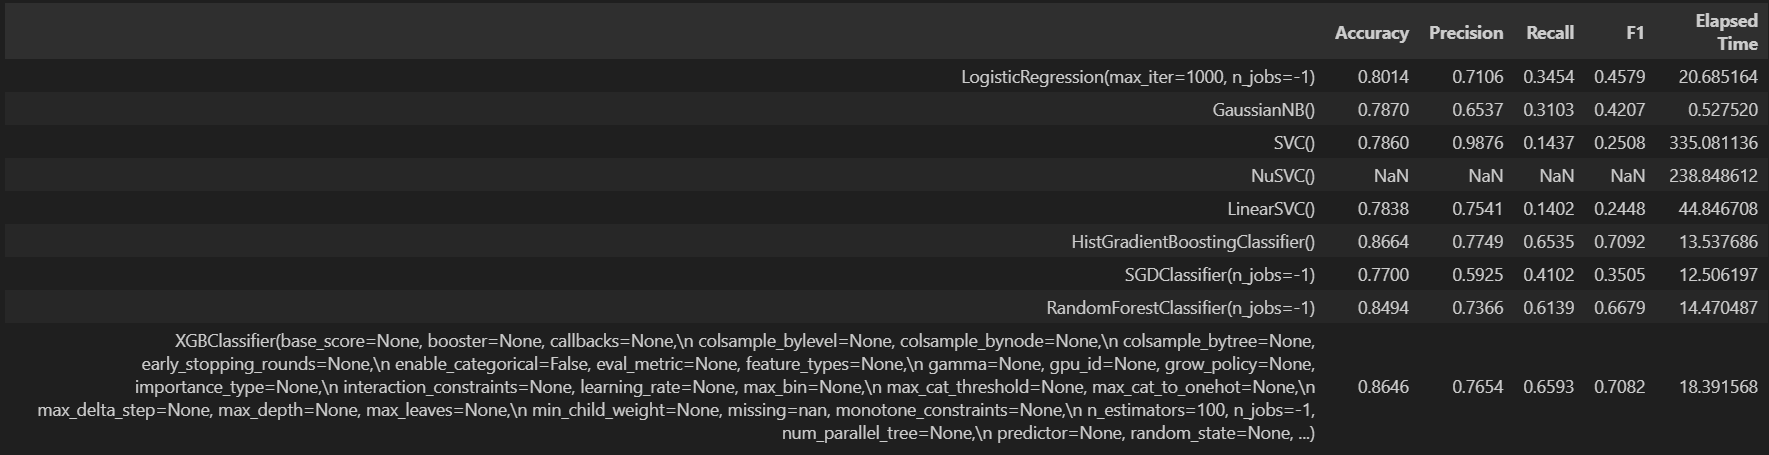

In [52]:
# Loop through all the base models, fit and evaluate with training data.
df_list = []

for item in models_list:
    try:
        print(f"Fitting {item} now...")
        df_model = model_fit_score(X_train, y_train, item, random_state=42, n_splits=5)
        df_list.append(df_model)
    except ValueError:
        print(f"Could not fit {item} due to error: {ValueError}")

results = pd.concat(df_list)
results

Fitting LogisticRegression(max_iter=1000, n_jobs=-1, random_state=42) now...


Fitting GaussianNB() now...
Fitting HistGradientBoostingClassifier(random_state=42) now...
Fitting SGDClassifier(n_jobs=-1, random_state=42) now...
Fitting RandomForestClassifier(n_jobs=-1, random_state=42) now...
Fitting XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, random_state=42, ...) now...
Fitting <catboost

Accuracy  Precision  \
LogisticRegression(max_iter=1000, n_jobs=-1, ra...    0.8401     0.7258   
GaussianNB()                                          0.7493     0.5007   
HistGradientBoostingClassifier(random_state=42)       0.8659     0.7760   
SGDClassifier(n_jobs=-1, random_state=42)             0.8366     0.6976   
RandomForestClassifier(n_jobs=-1, random_state=42)    0.8471     0.7289   
XGBClassifier(base_score=None, booster=None, ca...    0.8647     0.7652   
<catboost.core.CatBoostClassifier object at 0x0...    0.8661     0.7763   

                                                    Recall      F1  \
LogisticRegression(max_iter=1000, n_jobs=-1, ra...  0.5763  0.6424   
GaussianNB()                                        0.8042  0.6158   
HistGradientBoostingClassifier(random_state=42)     0.6496  0.7072   
SGDClassifier(n_jobs=-1, random_state=42)           0.6112  0.6502   
RandomForestClassifier(n_jobs=-1, random_state=42)  0.6156  0.6674   
XGBClassifier(base_score=None, booster=None, ca...  0.6599  0.7086   
<catboost.core.CatBoostClassifier object at 0x0...  0.6500  0.7075   

                                                    Elapsed Time  
LogisticRegression(max_iter=1000, n_jobs=-1, ra...      6.676651  
GaussianNB()                                            1.131334  
HistGradientBoostingClassifier(random_state=42)         8.421102  
SGDClassifier(n_jobs=-1, random_state=42)               2.029939  
RandomForestClassifier(n_jobs=-1, random_state=42)     17.759419  
XGBClassifier(base_score=None, booster=None, ca...      3.753199  
<catboost.core.CatBoostClassifier object at 0x0...     94.828684

CatBoostClassifier appears to perform the best. Choose this as our base model.

### 3 Features Selection

In [53]:
cv = KFold(n_splits=5, random_state=42, shuffle=True)
rfecv_cbc = RFECV(estimator=CatBoostClassifier(thread_count=-1, random_state=42), cv=cv, step=1, n_jobs=-1, scoring="accuracy")
rfecv_cbc.fit(X_train, y_train)
rfecv_cbc.support_

Learning rate set to 0.043351
0:	learn: 0.6527100	total: 157ms	remaining: 2m 36s
1:	learn: 0.6156821	total: 170ms	remaining: 1m 24s
2:	learn: 0.5820274	total: 185ms	remaining: 1m 1s
3:	learn: 0.5537440	total: 199ms	remaining: 49.5s
4:	learn: 0.5287763	total: 212ms	remaining: 42.3s
5:	learn: 0.5061401	total: 226ms	remaining: 37.4s
6:	learn: 0.4873390	total: 241ms	remaining: 34.2s
7:	learn: 0.4688198	total: 254ms	remaining: 31.5s
8:	learn: 0.4529244	total: 267ms	remaining: 29.4s
9:	learn: 0.4401673	total: 282ms	remaining: 27.9s
10:	learn: 0.4284594	total: 299ms	remaining: 26.9s
11:	learn: 0.4190785	total: 311ms	remaining: 25.6s
12:	learn: 0.4099730	total: 324ms	remaining: 24.6s
13:	learn: 0.4017118	total: 336ms	remaining: 23.6s
14:	learn: 0.3940945	total: 349ms	remaining: 22.9s
15:	learn: 0.3884207	total: 362ms	remaining: 22.3s
16:	learn: 0.3823353	total: 374ms	remaining: 21.6s
17:	learn: 0.3796590	total: 387ms	remaining: 21.1s
18:	learn: 0.3748094	total: 401ms	remaining: 20.7s
19:	learn

array([ True,  True,  True,  True,  True, False,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True, False, False, False,  True, False, False])

In [54]:
rfecv_cbc_df = pd.DataFrame(zip(X_train.columns, rfecv_cbc.support_), columns=["Features", "Selection"])
rfecv_cbc_df

Features  Selection
0                age       True
1        workclass_0       True
2        workclass_1       True
3        workclass_2       True
4             fnlwgt       True
5        education_0      False
6        education_1       True
7        education_2       True
8        education_3      False
9        education_4       True
10   educational-num       True
11  marital-status_0       True
12  marital-status_1       True
13  marital-status_2       True
14      occupation_0       True
15      occupation_1       True
16      occupation_2       True
17      occupation_3       True
18    relationship_0       True
19    relationship_1       True
20    relationship_2       True
21            race_0       True
22            race_1      False
23            race_2       True
24          gender_0       True
25          gender_1       True
26      capital-gain       True
27      capital-loss       True
28    hours-per-week       True
29  native-country_0      False
30  native-country_1      False
31  native-country_2      False
32  native-country_3       True
33  native-country_4      False
34  native-country_5      False

In [55]:
X_train_new = X_train[rfecv_cbc_df[rfecv_cbc_df["Selection"] == True]["Features"].to_list()]
X_train_new[:5]

age  workclass_0  workclass_1  workclass_2    fnlwgt  education_1  \
28382 -0.873671            0            0            1  0.237824            0   
37203 -0.646703            0            0            1 -0.442622            0   
4558  -1.327607            0            0            1  1.190246            0   
6903   0.261169            0            0            1 -0.403498            1   
42661 -0.268423            0            1            1 -1.581757            0   

       education_2  education_4  educational-num  marital-status_0  ...  \
28382            1            1        -1.613277                 0  ...   
37203            1            0        -0.046403                 1  ...   
4558             0            0        -0.438122                 0  ...   
6903             0            0         1.128753                 0  ...   
42661            0            0        -0.438122                 0  ...   

       relationship_1  relationship_2  race_0  race_2  gender_0  gender_1  \
28382               1               0       0       0         0         1   
37203               1               1       0       0         0         1   
4558                0               1       0       0         1         0   
6903                1               0       0       0         0         1   
42661               1               0       1       0         0         1   

       capital-gain  capital-loss  hours-per-week  native-country_3  
28382     -0.146733      -0.21878        1.171112                 0  
37203     -0.146733      -0.21878        2.003934                 0  
4558      -0.146733      -0.21878       -0.910942                 0  
6903      -0.146733      -0.21878       -0.078120                 0  
42661     -0.146733      -0.21878       -0.078120                 0  

[5 rows x 27 columns]

In [56]:
results_rfecv_cbc = model_fit_score(X_train_new, y_train, CatBoostClassifier(thread_count=-1, random_state=42), random_state=42, n_splits=5)
results_rfecv_cbc

Accuracy  Precision  \
<catboost.core.CatBoostClassifier object at 0x0...     0.867      0.778   

                                                    Recall    F1  Elapsed Time  
<catboost.core.CatBoostClassifier object at 0x0...  0.6529  0.71    312.726567

### 4. Hyperparameters tuning

In [57]:
param_grid = {
    'depth': [6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'l2_leaf_reg': [1, 3, 5, 7, 9],
    'iterations': [100, 150, 200],
    'custom_loss': ['Logloss', 'CrossEntropy']
}

In [58]:
rscv_cbc = RandomizedSearchCV(estimator=CatBoostClassifier(thread_count=-1, random_state=42), param_distributions=param_grid, n_iter=100, scoring="accuracy", random_state=42, cv=5, verbose=3)
rscv_cbc.fit(X_train_new, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
0:	learn: 0.6826173	total: 12.7ms	remaining: 2.53s
1:	learn: 0.6726027	total: 27.6ms	remaining: 2.73s
2:	learn: 0.6622680	total: 40.1ms	remaining: 2.64s
3:	learn: 0.6524335	total: 51.1ms	remaining: 2.5s
4:	learn: 0.6429031	total: 63.2ms	remaining: 2.46s
5:	learn: 0.6341101	total: 76.8ms	remaining: 2.48s
6:	learn: 0.6258393	total: 87.4ms	remaining: 2.41s
7:	learn: 0.6183622	total: 98.3ms	remaining: 2.36s
8:	learn: 0.6113706	total: 110ms	remaining: 2.33s
9:	learn: 0.6034308	total: 123ms	remaining: 2.33s
10:	learn: 0.5961616	total: 136ms	remaining: 2.33s
11:	learn: 0.5892253	total: 148ms	remaining: 2.32s
12:	learn: 0.5826894	total: 162ms	remaining: 2.32s
13:	learn: 0.5764236	total: 171ms	remaining: 2.27s
14:	learn: 0.5697920	total: 183ms	remaining: 2.25s
15:	learn: 0.5631670	total: 195ms	remaining: 2.25s
16:	learn: 0.5564341	total: 209ms	remaining: 2.25s
17:	learn: 0.5509131	total: 221ms	remaining: 2.23s
18:	learn: 0.5448789	t

78:	learn: 0.3804091	total: 972ms	remaining: 1.49s
79:	learn: 0.3796425	total: 985ms	remaining: 1.48s
80:	learn: 0.3784192	total: 997ms	remaining: 1.46s
81:	learn: 0.3774780	total: 1.01s	remaining: 1.45s
82:	learn: 0.3762997	total: 1.02s	remaining: 1.44s
83:	learn: 0.3754263	total: 1.03s	remaining: 1.43s
84:	learn: 0.3744074	total: 1.05s	remaining: 1.42s
85:	learn: 0.3735889	total: 1.06s	remaining: 1.41s
86:	learn: 0.3730091	total: 1.08s	remaining: 1.4s
87:	learn: 0.3721102	total: 1.09s	remaining: 1.38s
88:	learn: 0.3710689	total: 1.1s	remaining: 1.37s
89:	learn: 0.3702069	total: 1.11s	remaining: 1.36s
90:	learn: 0.3693217	total: 1.13s	remaining: 1.35s
91:	learn: 0.3686194	total: 1.14s	remaining: 1.34s
92:	learn: 0.3677634	total: 1.15s	remaining: 1.33s
93:	learn: 0.3668953	total: 1.17s	remaining: 1.31s
94:	learn: 0.3660721	total: 1.18s	remaining: 1.3s
95:	learn: 0.3653848	total: 1.19s	remaining: 1.29s
96:	learn: 0.3645087	total: 1.2s	remaining: 1.28s
97:	learn: 0.3639501	total: 1.22s	r

RandomizedSearchCV(cv=5,
                   estimator=<catboost.core.CatBoostClassifier object at 0x00000218A2759810>,
                   n_iter=100,
                   param_distributions={'custom_loss': ['Logloss',
                                                        'CrossEntropy'],
                                        'depth': [6, 8, 10],
                                        'iterations': [100, 150, 200],
                                        'l2_leaf_reg': [1, 3, 5, 7, 9],
                                        'learning_rate': [0.01, 0.05, 0.1]},
                   random_state=42, scoring='accuracy', verbose=3)

In [59]:
rscv_cbc.best_params_

{'learning_rate': 0.1,
 'l2_leaf_reg': 5,
 'iterations': 200,
 'depth': 6,
 'custom_loss': 'Logloss'}

In [60]:
rscv_cbc.best_score_

0.8674197710478003

In [61]:
rscv_cbc.best_estimator_

#### 5. Train the original model with the new training data (from features selection steps)
Note: This is because the tuned model actually performs similar to the original (baseline) model, hence we will just use the original model.

However we will use the selected features from RFECV since these features perform better.

In [62]:
# Instantiate the tuned CatBoostClassifier model
model = CatBoostClassifier(**rscv_cbc.best_params_, thread_count=-1, random_state=42)

# Train the model with selected features
model.fit(X_train_new, y_train)

0:	learn: 0.5985385	total: 14.3ms	remaining: 2.85s
1:	learn: 0.5329752	total: 30.9ms	remaining: 3.06s
2:	learn: 0.4829524	total: 52.3ms	remaining: 3.44s
3:	learn: 0.4458772	total: 88.1ms	remaining: 4.32s
4:	learn: 0.4192467	total: 104ms	remaining: 4.04s
5:	learn: 0.3982771	total: 118ms	remaining: 3.82s
6:	learn: 0.3833591	total: 131ms	remaining: 3.6s
7:	learn: 0.3728511	total: 148ms	remaining: 3.55s
8:	learn: 0.3633058	total: 162ms	remaining: 3.44s
9:	learn: 0.3572064	total: 204ms	remaining: 3.87s
10:	learn: 0.3507806	total: 216ms	remaining: 3.71s
11:	learn: 0.3469298	total: 229ms	remaining: 3.58s
12:	learn: 0.3428656	total: 242ms	remaining: 3.48s
13:	learn: 0.3395938	total: 256ms	remaining: 3.39s
14:	learn: 0.3360610	total: 269ms	remaining: 3.32s
15:	learn: 0.3333696	total: 284ms	remaining: 3.27s
16:	learn: 0.3313414	total: 296ms	remaining: 3.19s
17:	learn: 0.3290604	total: 309ms	remaining: 3.12s
18:	learn: 0.3271638	total: 320ms	remaining: 3.05s
19:	learn: 0.3252827	total: 332ms	rema

33:	learn: 0.3087773	total: 517ms	remaining: 2.53s
34:	learn: 0.3081498	total: 532ms	remaining: 2.5s
35:	learn: 0.3075387	total: 545ms	remaining: 2.48s
36:	learn: 0.3070012	total: 557ms	remaining: 2.45s
37:	learn: 0.3063596	total: 569ms	remaining: 2.42s
38:	learn: 0.3053703	total: 581ms	remaining: 2.4s
39:	learn: 0.3049696	total: 594ms	remaining: 2.38s
40:	learn: 0.3042763	total: 611ms	remaining: 2.37s
41:	learn: 0.3037998	total: 651ms	remaining: 2.45s
42:	learn: 0.3032673	total: 677ms	remaining: 2.47s
43:	learn: 0.3028510	total: 696ms	remaining: 2.47s
44:	learn: 0.3020596	total: 711ms	remaining: 2.45s
45:	learn: 0.3018110	total: 725ms	remaining: 2.43s
46:	learn: 0.3012875	total: 739ms	remaining: 2.4s
47:	learn: 0.3008936	total: 752ms	remaining: 2.38s
48:	learn: 0.2999872	total: 765ms	remaining: 2.36s
49:	learn: 0.2996167	total: 777ms	remaining: 2.33s
50:	learn: 0.2991518	total: 790ms	remaining: 2.31s
51:	learn: 0.2986419	total: 802ms	remaining: 2.28s
52:	learn: 0.2980952	total: 815ms	

#### 6. Validate the model with RFECV validation and test data

In [63]:
X_val_new = X_val[rfecv_cbc_df[rfecv_cbc_df["Selection"] == True]["Features"].to_list()]

In [64]:
results_val = model_fit_score(X_val_new, y_val, model, random_state=42, n_splits=5)

In [65]:
results_val

Accuracy  Precision  \
<catboost.core.CatBoostClassifier object at 0x0...    0.8603       0.76   

                                                    Recall      F1  \
<catboost.core.CatBoostClassifier object at 0x0...  0.6338  0.6908   

                                                    Elapsed Time  
<catboost.core.CatBoostClassifier object at 0x0...     14.579203

Fit with the test data.

In [66]:
X_test_new = X_test[rfecv_cbc_df[rfecv_cbc_df["Selection"] == True]["Features"].to_list()]

In [67]:
results_test = model_fit_score(X_test_new, y_test, model, random_state=42, n_splits=5)

In [68]:
results_test

Accuracy  Precision  \
<catboost.core.CatBoostClassifier object at 0x0...     0.864     0.7774   

                                                    Recall      F1  \
<catboost.core.CatBoostClassifier object at 0x0...  0.6194  0.6894   

                                                    Elapsed Time  
<catboost.core.CatBoostClassifier object at 0x0...      8.621506

In [69]:
results_final = {
        "Base Model & Training Data": [results["Accuracy"][6]],
    "Base Model & RFECV Training Data": [results_rfecv_cbc["Accuracy"][0]],
    "Tuned Model & Training Data": [rscv_cbc.best_score_],
    "Tuned Model & RFECV Validation Data": [results_val["Accuracy"][0]],
    "Tuned Model & RFECV Test Data": [results_test["Accuracy"][0]]
}

pd.DataFrame(results_final)

Base Model & Training Data  Base Model & RFECV Training Data  \
0                      0.8661                             0.867   

   Tuned Model & Training Data  Tuned Model & RFECV Validation Data  \
0                      0.86742                               0.8603   

   Tuned Model & RFECV Test Data  
0                          0.864

CatBoostClassifier performs best with training, while performs slightly weaker with unseen data like validation and test data but not by much anyway.

Since the prediction performance doesn't drop by too much on unseen data, this model can be considered as robust without under or overfitting issues.

#### 6. ROC Curve and confusion Matrix

In [70]:
y_scores = model.predict_proba(X_test)[:,1]
y_scores

array([0.02389512, 0.20933432, 0.54421531, ..., 0.24147111, 0.19306613,
       0.01080649])

In [71]:
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

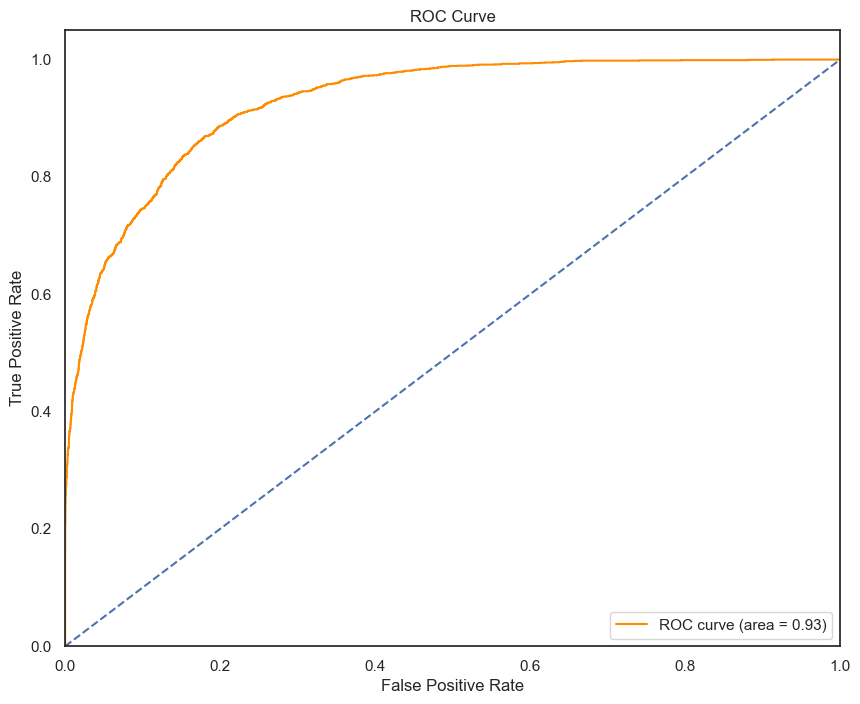

In [72]:
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color="darkorange", label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1], [0,1], linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show();

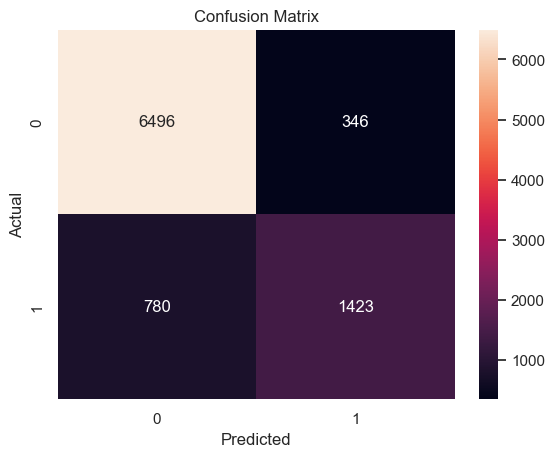

In [73]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
# plt.xticks([0, 1], ["<=50k", ">50k"])
# plt.yticks([0, 1], ["<=50k", ">50k"])
plt.title("Confusion Matrix")
plt.show();